**План**:  
1. [Подготовка данных к анализу](#1)
2. [Рассчет метрик](#2)  
2.1 [Продуктовые метрики](#3)  
2.2 [Метрики электронной коммерции](#4)  
2.3 [Маркетинговые метрики](#5)
3. [Выводы и рекомендации](#6)

##### Шаг 1. Подготовка данных к анализу <a id="1"></a>

In [2]:
#запускаем первым шагом все предполагаемые билиотеки, при необходимости в ходе проекта дополняем этот пункт
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy import stats as st
from math import factorial
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#создаем переменные для каждого датасета
df_v = pd.read_csv('/content/visits_log.csv')
df_o = pd.read_csv('/content/orders_log.csv')
df_c = pd.read_csv('/content/costs.csv')

#### Шаг 1.1. Изучаем датасет с логами визитов на сайт 

In [5]:
#изучаем инфомацию по первому датасету
df_v.sample(n = 10, random_state = 1) 

,Device,End Ts,Source Id,Start Ts,Uid
88191,desktop,2017-06-06 14:37:00,3,2017-06-06 14:37:00,11364682022477532873
65369,touch,2018-05-11 16:03:00,5,2018-05-11 15:58:00,10332259912753360384
180513,touch,2018-02-02 23:10:00,2,2018-02-02 23:03:00,15180777918191498336
31555,desktop,2017-07-15 18:04:00,3,2017-07-15 18:03:00,13809432224998083957
204924,touch,2018-04-11 23:00:00,4,2018-04-11 22:58:00,7822725902393117731
94622,touch,2018-03-05 22:55:00,4,2018-03-05 22:51:00,17663412382986174672
29105,desktop,2017-11-08 16:40:00,3,2017-11-08 15:59:00,17986397868054084245
10437,desktop,2017-07-17 14:15:00,9,2017-07-17 14:01:00,14199938549634734629
161067,desktop,2017-10-09 08:45:00,5,2017-10-09 08:43:00,970975784987511180
155514,desktop,2017-12-01 15:20:00,4,2017-12-01 15:18:00,2822215983478115241


In [6]:
#проверяем типы данных в столбцах и кол-во строк
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210053 entries, 0 to 210052
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     210053 non-null  object
 1   End Ts     210053 non-null  object
 2   Source Id  210053 non-null  int64 
 3   Start Ts   210053 non-null  object
 4   Uid        210053 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 8.0+ MB


In [7]:
#меняем типа данных
df_v['End Ts'] = pd.to_datetime(df_v['End Ts'])
df_v['Start Ts'] = pd.to_datetime(df_v['Start Ts'])

In [8]:
#переименуем столбцы, чтобы убрать пробелы и заглавные буквы
df_v.columns = ['device','end_ts','source_id', 'start_ts', 'uid']

In [10]:
df_v.describe()

,source_id,uid
count,210053.000000,2.100530e+05
mean,3.747897,9.203570e+18
std,1.909821,5.299432e+18
min,1.000000,1.818100e+04
25%,3.000000,4.612689e+18
50%,4.000000,9.240327e+18
75%,5.000000,1.372857e+19
max,10.000000,1.844668e+19


In [11]:
#ищем дубликаты
df_v.duplicated().sum()

0

**Наблюдение:**  
В датасете с логами визитов 359 400 строк в каждом столбце. Нет дубликатов и пропусков. Существует 10 источников, с которых пользователи зашли на наш сайт.

#### Шаг 1.2 Изучаем датасет с логами заказов

In [12]:
#изучаем инфомацию по второму датасету
df_o.sample(n = 10, random_state = 1) 

,Buy Ts,Revenue,Uid
7271,2017-09-09 01:29:00,1.10,7674233352595996409
36523,2018-02-23 08:56:00,1.71,8129244829733440960
41828,2018-03-25 16:47:00,1.22,9003018755281849036
39266,2018-03-10 11:51:00,4.28,775704491445963998
10615,2017-10-04 17:31:00,4.58,5139615590553126732
39590,2018-03-12 14:37:00,1.54,17322829838415263008
33831,2018-02-09 22:36:00,2.44,6917790636196771579
8441,2017-09-20 20:11:00,1.34,4195018562480487182
35611,2018-02-18 23:27:00,0.85,17082801536003975717
12989,2017-10-16 10:18:00,1.83,8787007543901122020


In [13]:
#проверяем типы данных в столбцах и кол-во строк
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [14]:
#меняем типа данных
df_o['Buy Ts'] = pd.to_datetime(df_o['Buy Ts'])

In [15]:
#переименуем столбцы, чтобы убрат пробелы и заглавные буквы
df_o.columns = ['buy_ts','revenue','uid']

In [16]:
df_o.describe()

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [17]:
#посчитаем кол-во строк с покупкой за 0 у.е.
df_oz = df_o.query('revenue == 0')
df_oz.count()

buy_ts     51
revenue    51
uid        51
dtype: int64

In [18]:
#сгруппируем данные по пользователяем для того передать ее на проверку
df_oz.pivot_table(index = ['uid','buy_ts'], values = 'revenue', aggfunc = 'count')

revenue
uid                  buy_ts                      
184148767273119549   2017-08-02 14:54:00        1
1149062814762747892  2017-12-13 19:36:00        1
1879819502567241225  2017-12-05 11:22:00        1
2037345392173160982  2017-11-28 19:42:00        1
                     2017-11-30 17:26:00        1
                     2017-11-30 18:30:00        1
                     2017-11-30 20:05:00        1
                     2017-11-30 21:34:00        1
                     2017-11-30 21:49:00        1
                     2017-12-01 14:59:00        1
                     2017-12-01 16:37:00        1
                     2017-12-01 19:10:00        1
                     2017-12-02 21:36:00        1
                     2017-12-02 21:42:00        1
                     2017-12-02 23:58:00        1
2636645662067512510  2017-11-28 20:58:00        1
2883839899480223178  2017-09-18 16:49:00        1
                     2017-10-26 17:31:00        1
2936104404423239931  2017-12-01 18:05:00        1
4927261749585088199  2018-04-21 13:02:00        1
                     2018-04-21 16:13:00        1
                     2018-04-21 20:14:00        1
                     2018-04-21 21:42:00        1
5342067285161169772  2018-02-01 15:57:00        1
5570343171257035973  2018-04-20 17:33:00        1
                     2018-04-22 13:54:00        1
                     2018-04-22 16:16:00        1
                     2018-04-22 18:38:00        1
5603453646174104178  2017-08-09 14:48:00        1
                     2017-08-23 13:43:00        1
                     2017-08-30 16:30:00        1
                     2017-09-06 13:57:00        1
                     2017-09-07 14:37:00        1
                     2017-10-26 11:39:00        1
6538135401269860305  2017-12-04 22:08:00        1
8277558335454815700  2017-11-27 15:13:00        1
                     2017-11-27 16:03:00        1
                     2017-11-28 16:01:00        1
                     2017-11-28 21:13:00        1
                     2017-11-29 17:20:00        1
                     2017-11-29 17:55:00        1
9971607959588724150  2017-11-30 20:24:00        1
10169885790465067808 2017-09-11 16:53:00        1
10281425020415612933 2017-07-07 15:54:00        1
12296506984642158789 2017-12-01 16:44:00        1
13486014841579728464 2018-03-22 04:52:00        1
13594493436687104785 2017-11-28 12:43:00        1
14872085179275033073 2018-05-26 12:12:00        1
14973814017160376581 2018-05-28 08:55:00        1
15254206642996645755 2017-12-01 17:53:00        1
17030528792926543083 2017-06-22 18:19:00        1

In [19]:
df_ol = df_o.query('revenue > 0')

In [20]:
df_ol.duplicated().sum()

0

Text(0.5, 0, 'ID пользователей')

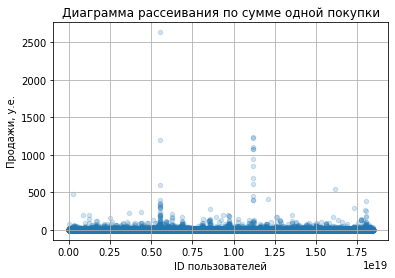

In [21]:
df_ol.plot(kind = 'scatter',x = 'uid', y = 'revenue',grid = True, alpha = 0.2)
plt.title('Диаграмма рассеивания по сумме одной покупки') #называем таблицу
plt.ylabel('Продажи, у.е.') #назовем сторону y
plt.xlabel('ID пользователей') #назовем сторону x

**Наблюдение:**  
В датасете с покупками содержится 50 415, что говорит нам о том, что далеко не все заходы на сайт заканчивались покупкой.   
В 51 случае разным пользователям удалось совершить покупки на 0 рублей (возможно по этим заказам были возвраты). В дальнейшем анализе эти случаи мы не будем использовать. Однако стоит передать данные по ним для разбора произашедшего.   
Также на диаграмме рассеивания видно, что большая часть пользователей за раз покупает на 2.5 у.е., однако существуют и уникальные случаи покупок более, чем на 500 и даже 2500 у.е.

##### 1.3 Изучаем датасет с данными по расходам

In [22]:
#изучаем информацию к третьему датасету
df_c.sample(n = 10, random_state = 1) 

,source_id,dt,costs
1481,5,2017-06-30,77.88
1833,9,2017-06-18,9.44
2045,9,2018-01-16,13.90
1785,5,2018-05-01,79.99
1402,4,2018-04-12,160.14
705,2,2018-05-11,82.25
297,1,2018-03-25,87.70
1246,4,2017-11-05,387.64
1742,5,2018-03-18,122.82
1028,3,2018-03-30,39.26


In [23]:
#проверяем типы данных в столбцах и кол-во строк
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [24]:
#меняем типа данных
df_c['dt'] = pd.to_datetime(df_c['dt'])

In [25]:
df_c.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [26]:
df_c.duplicated().sum()

0

**Наблюдение**:  
Датасет с затрами содержит всего 2542 строки. В нем также представлены рекламные источнике. Их также 10, как и в дасатесете с визитами на сайт, что говорит нам о том, что с каждого рекламного источника был как минимум 1 визит на сайт.  
Затраты на каждую платформу в сутки распределены не равномерно: от 21.9 до 170 у.е., максимальной же затратой было 1788 у.е. на одного один источник в день.

### Шаг 2.0 Рассчитаем метрики  <a id="2"></a>

#### Шаг 2.1 Рассчитаем продуктовые  метрики <a id="3"></a>

##### Шаг 2.1.1 Рассчитаем  DAU,WAU,MAU

In [27]:
#добавим дополнительные столбцы с годом, номером месяца, недели и датой без времени начала сессии на сайте
df_v['session_year']  = df_v['start_ts'].dt.year
df_v['session_month'] = df_v['start_ts'].dt.month
df_v['session_week']  = df_v['start_ts'].dt.week
df_v['session_date'] = df_v['start_ts'].dt.date

In [28]:
#найдем кол-во уникальных пользователей в день
dau = df_v.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
#найдем кол-во уникальных пользователей в день за весь период времени
dau_total = dau.mean()
dau_total

uid    547.879121
dtype: float64

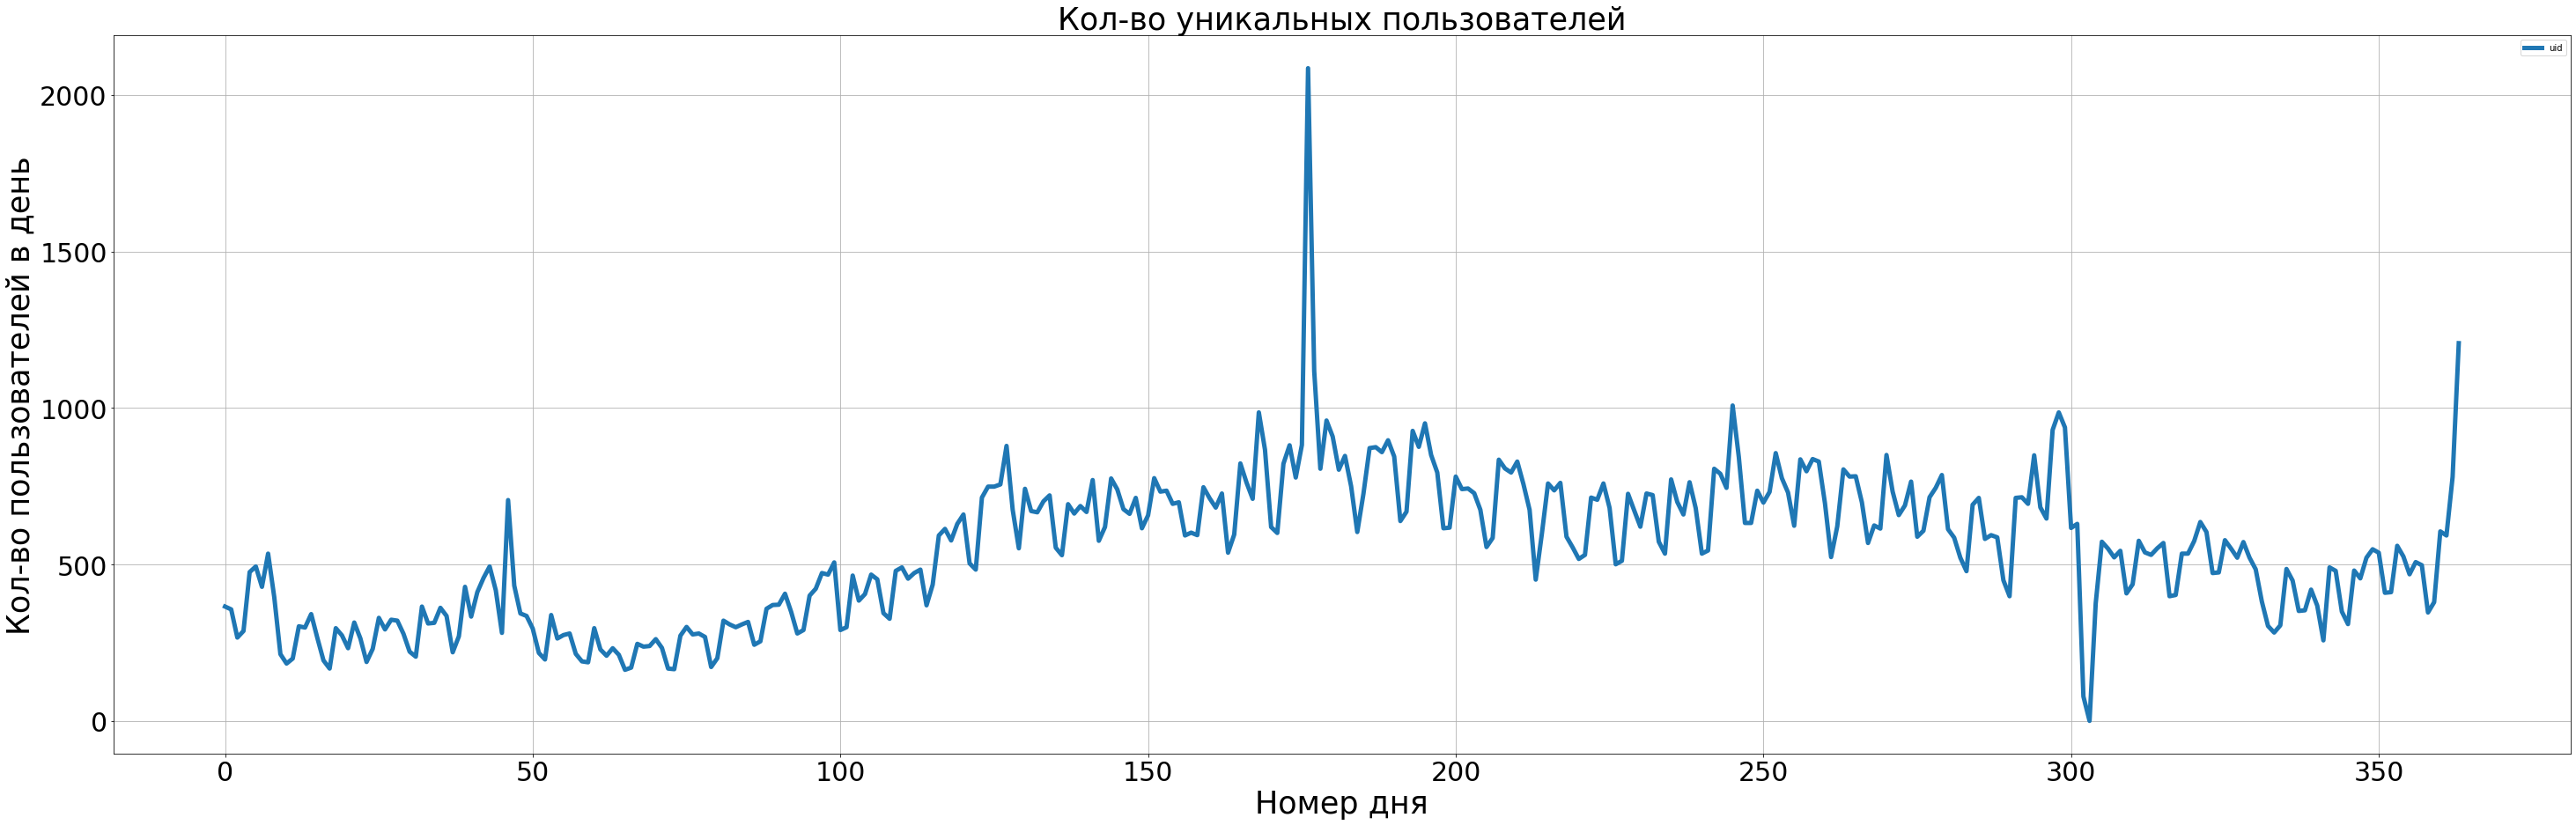

In [29]:
af = dau.plot(y = 'uid',grid = True,figsize = (50,15),linewidth=5)
af.set_ylabel('Кол-во пользователей в день',fontsize=35) 
af.set_xlabel('Номер дня', fontsize=35) 
af.set_title('Кол-во уникальных пользователей', fontsize=35) 
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [30]:
#найдем день с наибольшей активностью пользователей
dau.query('uid>3000')

,session_date,uid


In [31]:
#найдем день с наименьшей активностью пользователей
dau.query('uid<100')

,session_date,uid
302,2018-03-30,79
303,2018-03-31,1


In [32]:
#найдем кол-во уникальных пользователей в неделю
wau = df_v.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
#найдем кол-во уникальных пользователей в неделю в среднем
wau_total = wau.mean()
wau_total

uid    3518.811321
dtype: float64

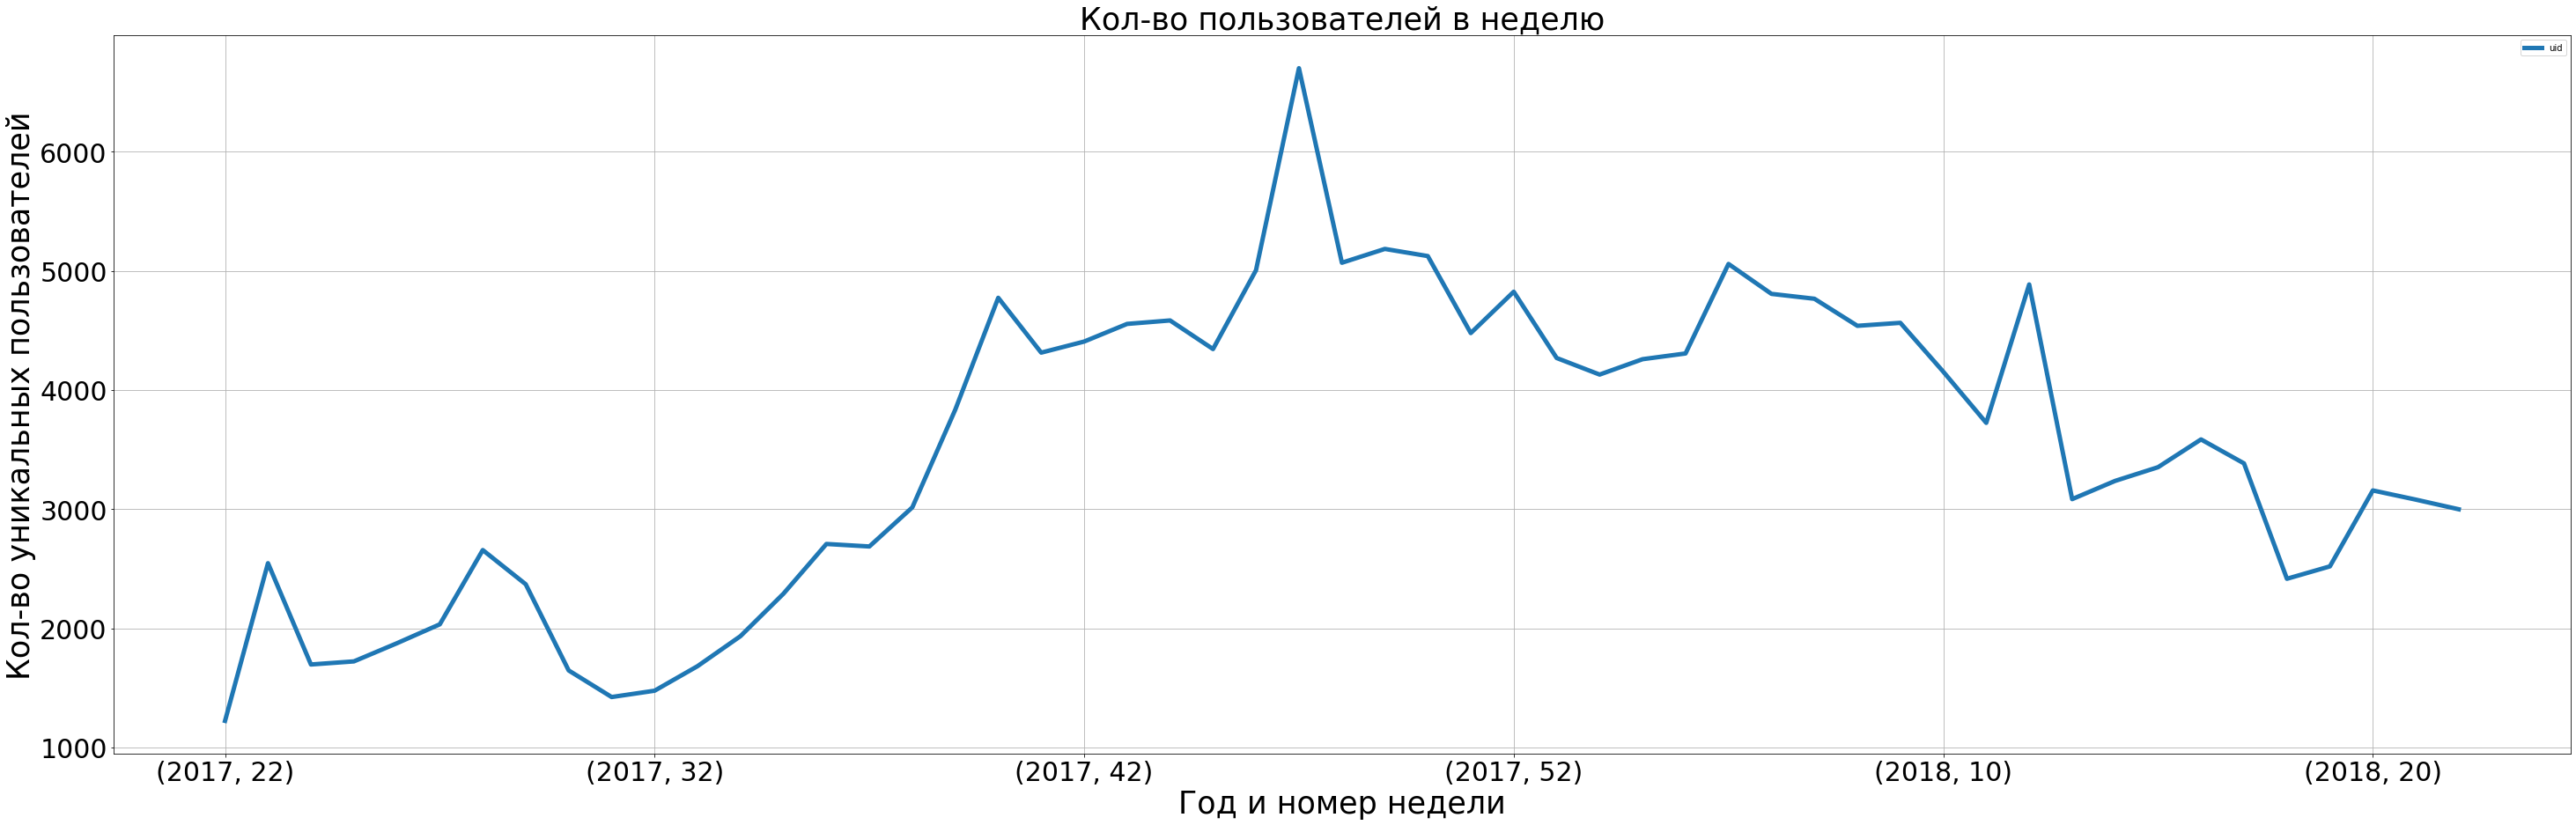

In [33]:
aq = wau.plot(grid = True, figsize = (50,15), linewidth=5)
aq.set_xlabel("Год и номер недели", fontsize=35)
aq.set_ylabel("Кол-во уникальных пользователей", fontsize=35)
aq.set_title("Кол-во пользователей в неделю", fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [34]:
#найдем кол-во уникальных пользователей в месяц
mau = df_v.groupby(['session_year','session_month']).agg({'uid': 'nunique'})
#найдем кол-во уникальных пользователей в месяц в среднем
mau_total = mau.mean()
mau_total

uid    14546.083333
dtype: float64

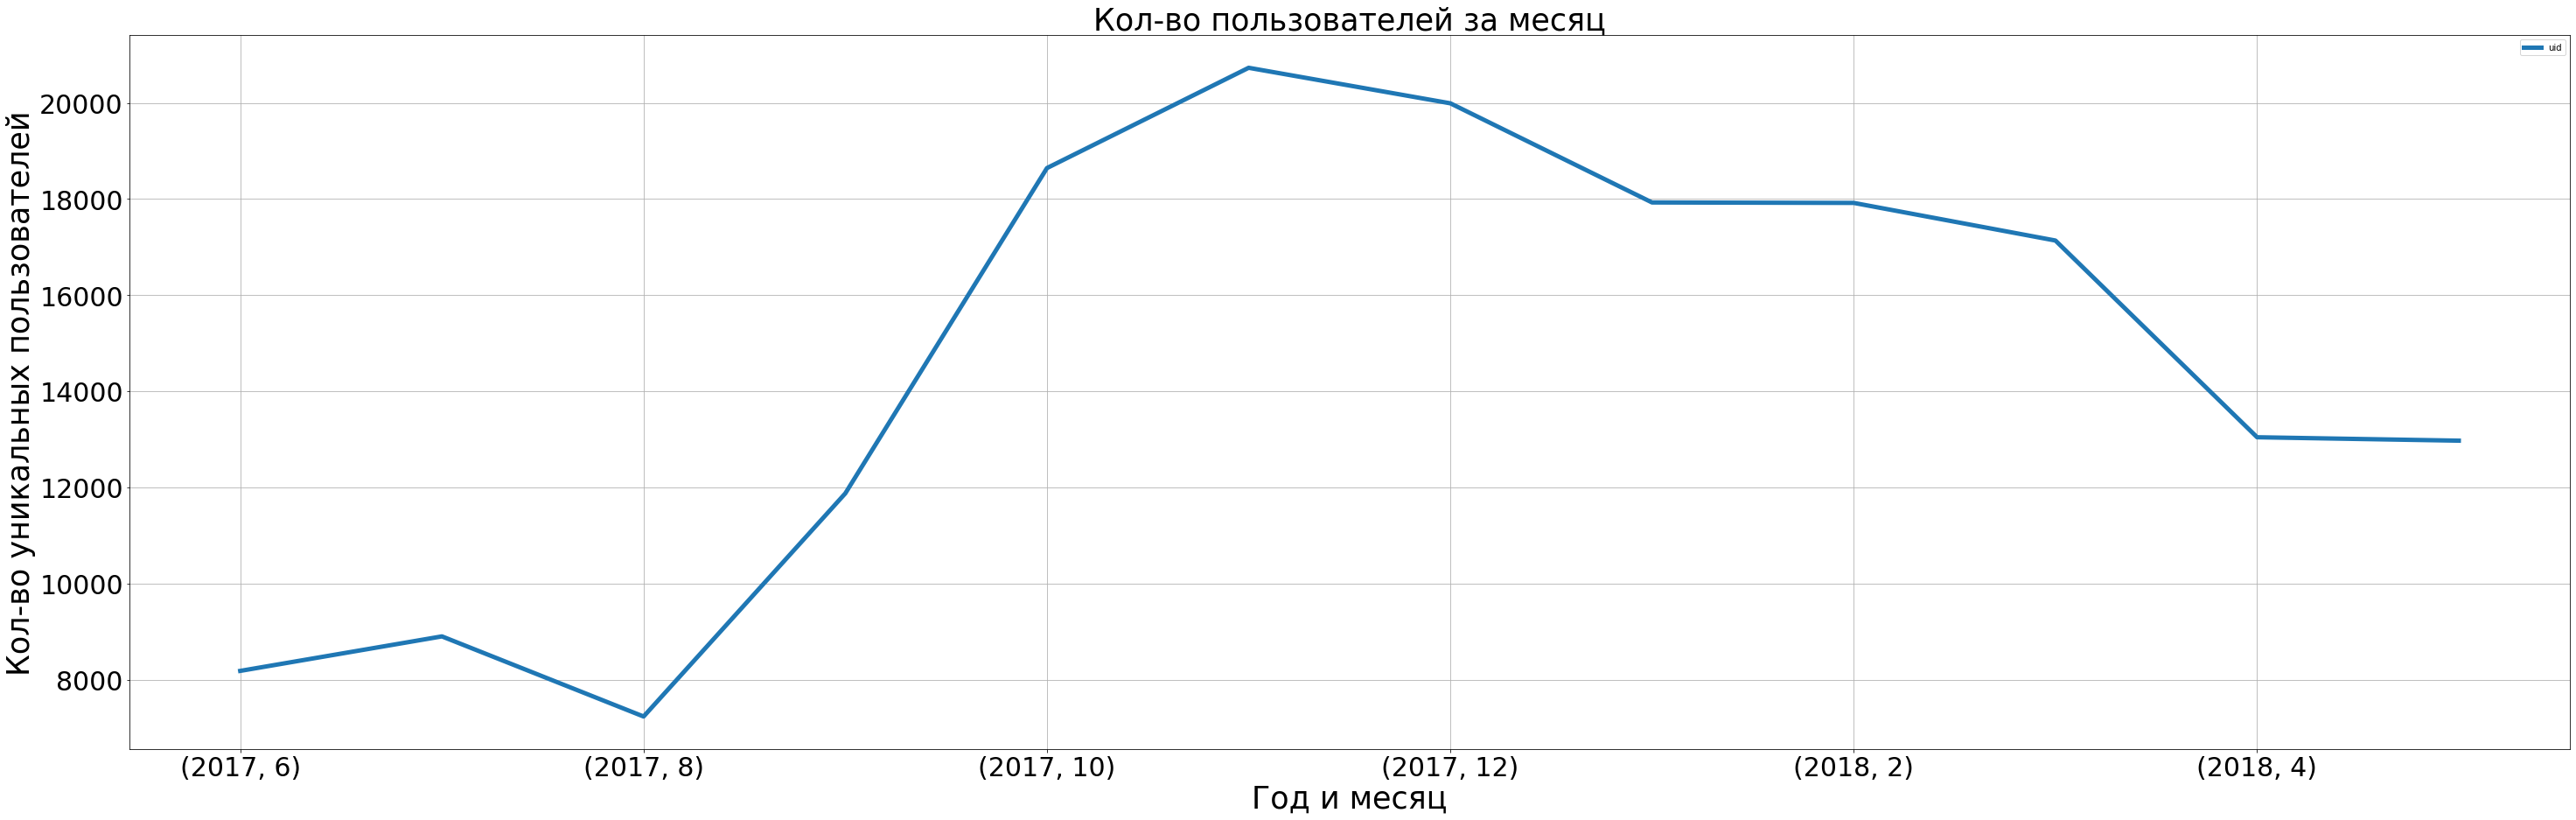

In [35]:
ax = mau.plot(grid = True, figsize = (50,15), linewidth=5)
ax.set_xlabel("Год и месяц", fontsize=35)
ax.set_ylabel("Кол-во уникальных пользователей", fontsize=35)
ax.set_title("Кол-во пользователей за месяц", fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

In [36]:
sticky_mau = (dau_total/mau_total * 100).round()
sticky_wau = (dau_total/wau_total * 100).round()
sticky_mau, sticky_wau

(uid    4.0
 dtype: float64, uid    16.0
 dtype: float64)

###### Вывод: 
В среднем за год исследования основные продуктовые характеристики следующие:   
DAU(кол-во уникальных пользователей в день) - 908 ч  
WAU(кол-во уникальных пользователей в неделю) - 5716 ч  
MAU(кол-во уникальных пользователей в месяц) - 23 228 ч  
Графики визитов пользователей на сайт демонстрируют нам  нестабильность по дням даже в рамках одной недели. Пиковая активность была 2017-11-24 ( Черная пятница), где кол-во визитов на сайт составило  3319, однако за год была и дата, когда сайт не работал вовсе - это 2018-03-31.  
Также стоит отметить, что посещаемость нашего сайта стала значительно расти с 39 недели 2017 года, где кол-во уникальных пользователей  в неделю составло более 6000, при этом снова упала с данной планки с 13 недели 2018 года. Данный факт может говорить или о сезонности бизнеса или об усилении рекламной активности платформы в данном промежутке времени или о синергии этих факторов. 

##### Шаг 2.1.2 Рассчитаем  сколько раз за день пользователи в среднем заходят на сайт

In [39]:
#рассчитаем кол-во визитов на сайт и кол-во уникальных визитов
session_per_days = df_v.pivot_table(index = 'session_date', values = 'uid', aggfunc = ['count', 'nunique']).reset_index()
session_per_days.columns = ['session_date','count_uid','nunique_uid']
#рассчитаем кол-во визитов на 1ого пользователя
session_per_days['mean_session'] = session_per_days['count_uid'] / session_per_days['nunique_uid']
ms = session_per_days[['session_date','mean_session']]
ms.describe()

,mean_session
count,364.000000
mean,1.049579
std,0.016438
min,1.000000
25%,1.040000
50%,1.049164
75%,1.059581
max,1.138609


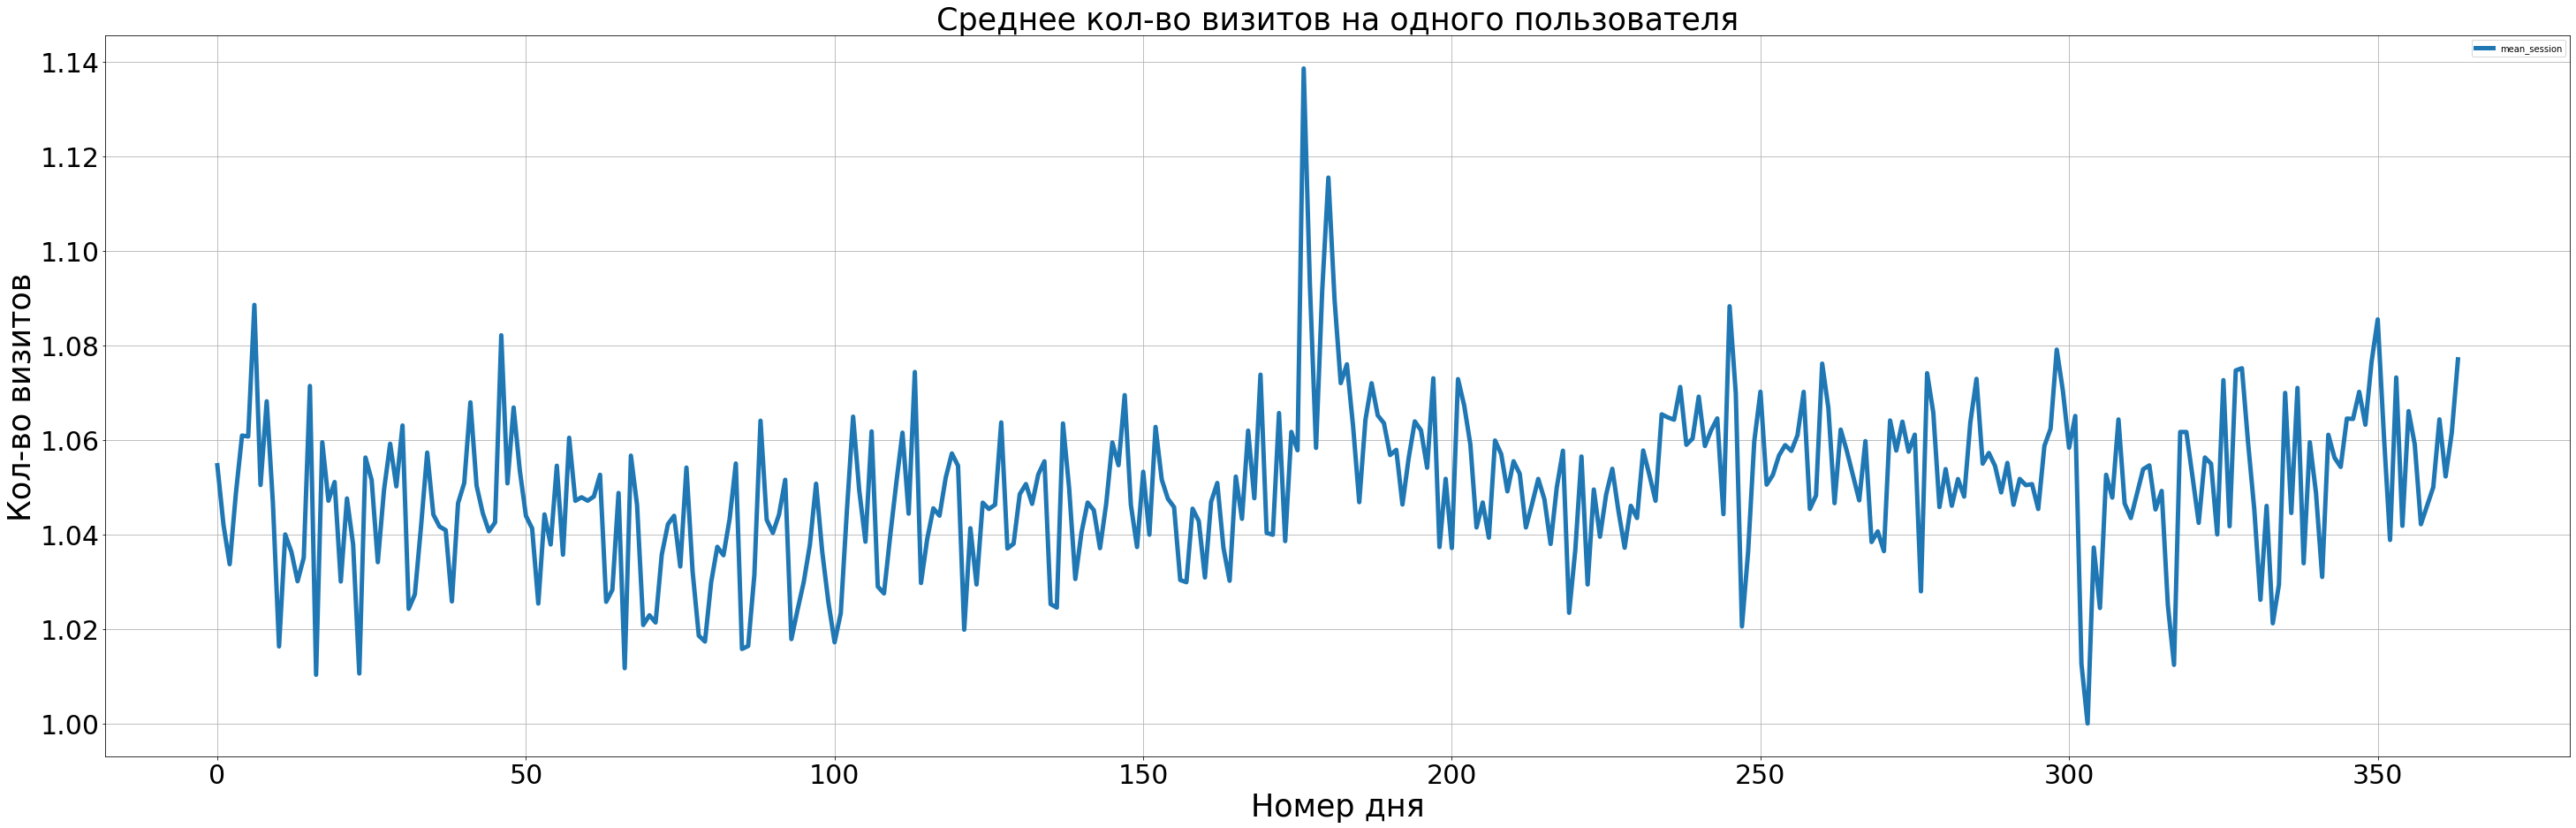

In [40]:
af = ms.plot(y = 'mean_session',grid = True,figsize = (50,15),linewidth=5)
af.set_ylabel('Кол-во визитов',fontsize=35) 
af.set_xlabel('Номер дня', fontsize=35) 
af.set_title('Среднее кол-во визитов на одного пользователя', fontsize=35) 
plt.tick_params(axis='both', which='major', labelsize=30)
plt.show()

###### Вывод:
Кол-во визитов один пользователь в день совершает от 1.07 до 1.09 в норме. В Черную пятницу же каждый пользователь посещал сайт 1.2 раза. Введу того, что кол-во уникальных пользователей и их визитов на сайт практически идентичны, то график "Среднего кол-ва визитов на одного пользователя" практически идентичен графику "Кол-во уникальных пользователей".

##### Шаг 2.1.3. Рассчитаем сколько времени пользователи проводят на сайте

In [41]:
#найдем продолжительность каждой сессии и переведем его в секунды
df_v['delta'] = (df_v['end_ts'] - df_v['start_ts']).dt.seconds

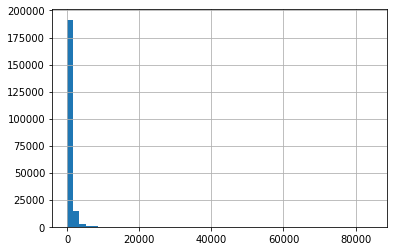

In [42]:
#изучим распределение на графике
df_v['delta'].hist(bins=50) 

In [43]:
#найдем ASL 
df_v['delta'].mode()

0    60
dtype: int64

In [44]:
#рассмотрим распределение delta по квантилям
df_v.describe()

,source_id,uid,session_year,session_month,session_week,delta
count,210053.000000,2.100530e+05,210053.000000,210053.000000,210053.000000,210053.000000
mean,3.747897,9.203570e+18,2017.452433,6.625256,27.012149,643.647556
std,1.909821,5.299432e+18,0.497733,3.855900,16.775147,1028.803247
min,1.000000,1.818100e+04,2017.000000,1.000000,1.000000,0.000000
25%,3.000000,4.612689e+18,2017.000000,3.000000,11.000000,120.000000
50%,4.000000,9.240327e+18,2017.000000,7.000000,26.000000,300.000000
75%,5.000000,1.372857e+19,2018.000000,10.000000,43.000000,840.000000
max,10.000000,1.844668e+19,2018.000000,12.000000,52.000000,84480.000000


In [45]:
#найдем ASL, убрав выбросы
df_duration = df_v.query('delta >=120 and delta<=840')
df_duration['delta'].mode()

0    120
dtype: int64

###### Вывод  
Средняя продолжительность сессии или ASL для нашего сайта равно 60 секундам, однако 10% всех сессий равны 0 секунд, а существуют и сессии больше нескольких десятков часов. Если убрать все выбросы, то ASL становится равным 120 секундам.   
P.S. Для рассчета данного показателя мы используем моду, так как распределение ASL далеко от нормального.

##### Шаг 2.1.4. Рассчитаем Retention Rate

In [46]:
#создадим столбец с датой первого входа на сайт по каждому пользователю
first_activity_date = df_v.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
#объеденим 2 датасета
df_v = df_v.join(first_activity_date,on='uid') 

In [47]:
#выделим из столбцов месяцы
df_v['activity_month'] = df_v['start_ts'].astype('datetime64[M]')
df_v['first_activity_month'] = df_v['first_activity_date'].astype('datetime64[M]')

In [48]:
#посчитаем lifetime в рамках каждой когорты
df_v['cohort_lifetime'] = df_v['activity_month'] - df_v['first_activity_month']

In [49]:
#переведем в значение месяца
df_v['cohort_lifetime'] = df_v['cohort_lifetime'] / np.timedelta64(1, 'M')

In [50]:
#округлим и изменим тип данных в столбце
df_v['cohort_lifetime'] = df_v['cohort_lifetime'].round().astype('int')

In [51]:
#посчитаем кол-во активных пользователей для каждой когорты
cohorts = df_v.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

In [52]:
#найдем исходное кол-во пользоватлей в когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]

In [53]:
#переименуем столбец
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

In [54]:
#соеденим 2 датасета
cohorts = cohorts.merge(initial_users_count,on='first_activity_month') 

In [55]:
#рассчитаем retention rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 

In [56]:
#создадим сводную таблицу для просмотра в динамике retention rate
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 

In [57]:
retention_pivot.index = retention_pivot.index.strftime("%m/%Y")

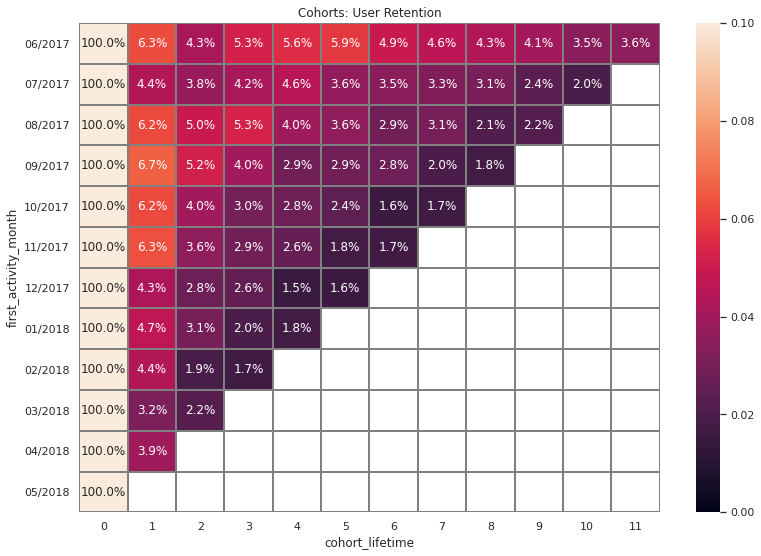

In [58]:
#визуализируем данные
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',vmin=0, vmax=0.1); 

In [59]:
#рассчитаем среднее значение на втором месяце жизни когорты
second_month_retention = retention_pivot[1].mean() * 100
second_month_retention

5.1391680191305475

###### Вывод   
Retention Rate, то есть насколько хорошо сайт удержимаем аудиторию, на втором месяце жизни когорты составляем в среднем 6.5% и колеблется от 8.5% (сентябрьская когорта) до 4.2% (мартовская когорта). При этом первая из исследуемых когорт (от июня 2017 года) демонстрирует  высокий Retention на протяжении всего своего существования и даже на 12ом месяце равна 4.5%

#### Шаг 2.2. Метрики электронной коммерции <a id="4"></a>

##### Шаг 2.2.1 Рассчитаем сколько времени проходит с первого посещения сайта до первой покупки

In [60]:
#создадим столбец с датой первой покупки на сайте 
first_revenue_date = df_ol.groupby(['uid'])['buy_ts'].min()
first_revenue_date.name = 'first_revenue_date'

In [61]:
#объеденим 2 столбца в датафрейм
delta_time = pd.DataFrame([first_activity_date,first_revenue_date]).T

In [62]:
#рассчитаем кол-во дней для каждого пользователя с первой покупки до первого входа на сайт
delta_time['delta'] = ((delta_time['first_revenue_date'] - delta_time['first_activity_date']).dt.seconds) /60

In [63]:
#удалим строки, когда посетитель сайта так и не стал клиентом
delta_time.dropna()

,first_activity_date,first_revenue_date,delta
uid,,,
313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0
2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
2551852515556206,2017-11-24 11:22:00,2017-11-24 10:14:00,1372.0
3077748354309989,2018-03-03 12:08:00,2018-03-03 12:33:00,25.0
3605148382144603,2017-10-03 21:29:00,2017-09-21 20:56:00,1407.0
...,...,...,...
18442290965339407211,2018-02-05 19:35:00,2018-02-05 19:39:00,4.0
18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,7.0
18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,663.0


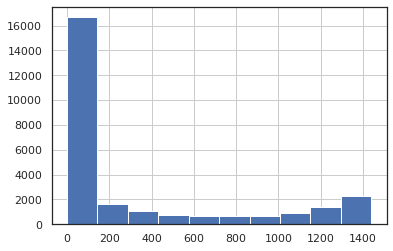

In [64]:
#изучим распределение
delta_time['delta'].hist(bins = 10)

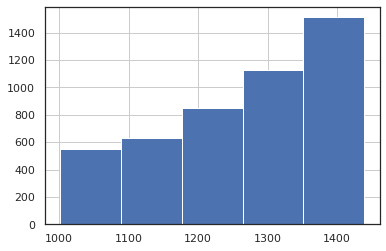

In [65]:
#посмотрим более детально на оплаты, совершенные после 1000 минут
delta_time.query('delta>1000')['delta'].hist(bins = 5)

In [66]:
delta_time.describe()

,delta
count,26757.000000
mean,333.068655
std,484.990996
min,0.000000
25%,5.000000
50%,30.000000
75%,569.000000
max,1439.000000


In [67]:
#посчитаем долю тех, кто совершает покупку менее, чем за 4 минуты
delta_time.query('delta < 4').count() / len (delta_time['delta'])

first_activity_date    0.03314
first_revenue_date     0.03314
delta                  0.03314
dtype: float64

In [68]:
#посчитаем долю тех, кто совершает покупку после 1000 минут с момента первого входа на сайт
delta_time.query('delta > 1000').count() / len (delta_time['delta'])

first_activity_date    0.02942
first_revenue_date     0.02942
delta                  0.02942
dtype: float64

###### Выводы  
1. С первого посещения сайта до момента певой покупки проходит в среднем 249 минут, то есть чуть более 4часов.  
2. В норме у одного пользователя уходит от 4х минут до 252х для выбора и оплаты своей покупки.
3. Пользователей, которые совершили оплату менее, чем за 4 минуты всего 3.9%
4. Стоит обратить внимание на группу пользователей, которые совершают покупку спустя 1000 минут после своего захода на сайт. Их всего 2% из общей выборки, однако они составляют 50% всех пользователей, которые совершили покупку после 252 минуты. Возможно мы сможем увеличить выручку на сайте, если сделает так, что эти пользователи будут совершать покупку быстрее. 

##### Шаг 2.2.2 Рассчитаем среднее кол-во покупок на одного покупателя за 6 месяцев

In [69]:
#соеденим 2 датасета
df_ol = df_ol.join(first_revenue_date,on='uid')

In [70]:
#выделим месяц из дат
df_ol['by_month'] = df_ol['buy_ts'].astype('datetime64[M]')
df_ol['first_by_month'] = df_ol['first_revenue_date'].astype('datetime64[M]')

In [71]:
#посчитаем lifetime в рамках каждой когорты
df_ol['cohort_lifetime2'] = df_ol['by_month'] - df_ol['first_by_month']

In [72]:
df_ol['cohort_lifetime2'] = df_ol['cohort_lifetime2'] / np.timedelta64(1, 'M')

In [73]:
df_ol['cohort_lifetime2'] = df_ol['cohort_lifetime2'].round().astype('int')

In [74]:
#сформируем датасет с кол-вом заказов и кол-вом клиентов
cohort = df_ol.query('by_month < "2018-06-01"').pivot_table(index = 'cohort_lifetime2',columns = 'by_month', values = ['revenue','uid'],aggfunc = {'revenue':'count','uid':'nunique'})
cohort

revenue             ...        uid           
by_month         2017-06-01 2017-07-01  ... 2018-04-01 2018-05-01
cohort_lifetime2                        ...                      
0                    2353.0     2185.0  ...     2274.0     2986.0
1                       NaN      177.0  ...       90.0       69.0
2                       NaN        NaN  ...       58.0       58.0
3                       NaN        NaN  ...       43.0       39.0
4                       NaN        NaN  ...       50.0       45.0
5                       NaN        NaN  ...       48.0       63.0
6                       NaN        NaN  ...       56.0       62.0
7                       NaN        NaN  ...       37.0       67.0
8                       NaN        NaN  ...       19.0       43.0
9                       NaN        NaN  ...       22.0       31.0
10                      NaN        NaN  ...       45.0       26.0
11                      NaN        NaN  ...        NaN       53.0

[12 rows x 24 columns]

In [75]:
#переименуем столбцы
cohort.columns = ['revenue_0','revenue_1','revenue_2','revenue_3','revenue_4','revenue_5','revenue_6','revenue_7','revenue_8','revenue_9','revenue_10','revenue_11', 'uid_0','uid_1','uid_2','uid_3','uid_4','uid_5','uid_6','uid_7','uid_8','uid_9','uid_10','uid_11']

In [76]:
#найдем среднее кол-во значений в месяц
cohort['average_2017-06'] = cohort["revenue_0"]/cohort["uid_0"]
cohort['average_2017-07'] = cohort["revenue_1"]/cohort["uid_1"]
cohort['average_2017-08'] = cohort["revenue_2"]/cohort["uid_2"]
cohort['average_2017-09'] = cohort["revenue_3"]/cohort["uid_3"]
cohort['average_2017-10'] = cohort["revenue_4"]/cohort["uid_4"]
cohort['average_2017-11'] = cohort["revenue_5"]/cohort["uid_5"]
cohort['average_2017-12'] = cohort["revenue_6"]/cohort["uid_6"]
cohort['average_2018-01'] = cohort["revenue_7"]/cohort["uid_7"]
cohort['average_2018-02'] = cohort["revenue_8"]/cohort["uid_8"]
cohort['average_2018-03'] = cohort["revenue_9"]/cohort["uid_9"]
cohort['average_2018-04'] = cohort["revenue_10"]/cohort["uid_10"]
cohort['average_2018-05'] = cohort["revenue_11"]/cohort["uid_11"]

In [77]:
#выведем только столбцы со средними значениями
a_cohorts = cohort[['average_2017-06','average_2017-07','average_2017-08','average_2017-09','average_2017-10','average_2017-11','average_2017-12','average_2018-01','average_2018-02','average_2018-03','average_2018-04','average_2018-05']]
a_cohorts

,average_2017-06,average_2017-07,average_2017-08,average_2017-09,average_2017-10,average_2017-11,average_2017-12,average_2018-01,average_2018-02,average_2018-03,average_2018-04,average_2018-05
cohort_lifetime2,,,,,,,,,,,,
0,1.163699,1.136837,1.119065,1.136487,1.143779,1.176802,1.152511,1.121554,1.121337,1.168930,1.093668,1.087408
1,NaN,2.901639,1.923077,1.862069,1.689922,1.524272,1.764706,1.849315,1.964912,1.881356,1.977778,2.826087
2,NaN,NaN,3.420000,2.105263,1.886792,1.616162,1.317073,1.516667,1.961165,1.915663,1.431034,3.034483
3,NaN,NaN,NaN,4.148148,1.625000,1.840909,2.216216,1.326087,1.990566,1.845361,1.488372,1.794872
4,NaN,NaN,NaN,NaN,3.344828,1.469388,2.125000,1.288462,1.387097,1.687500,1.720000,1.733333
5,NaN,NaN,NaN,NaN,NaN,3.253731,2.157895,1.937500,1.703125,1.430556,1.229167,1.666667
6,NaN,NaN,NaN,NaN,NaN,NaN,4.508197,1.694444,1.633333,1.621212,1.535714,1.645161
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.702128,1.282051,1.772727,1.513514,1.865672
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.655172,1.380952,2.421053,1.418605


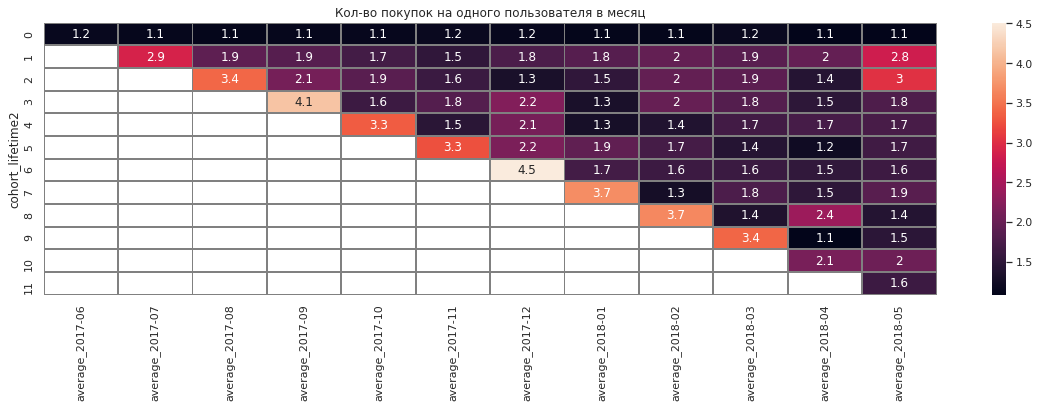

In [78]:
sns.set(style='white')
plt.figure(figsize=(20, 5))
plt.title('Кол-во покупок на одного пользователя в месяц')
sns.heatmap(a_cohorts, annot=True, linewidths=1, linecolor='gray')

###### Вывод  
На первом месяце жизни каждой кагорты  1 пользователь покупает 1.2 до 4.5 раз, при этом клиенты с июньской кагорты стабильно совершают от 1.1 - 1.2 покупки в месяц, а вот все остальные когорты значительно больше. Особенно выделяются когорты июля и августа, где кол-во покупок на одного клиента в месяц в мае 2018 достигло 2.8 и 3.0 соответсвенно.  
За первые же 6 месяцев представители первой когорты всреднем в месяце купили 1.13 раз, а вот те, кто сделал первый заказ в декабре 2017 года - 2.08 раза в месяц.

##### Шаг 2.2.3 Рассчитаем средний чек по месяцам

In [79]:
#рассчитаем средний чек по году
df_ol['revenue'].sum() / df_ol['revenue'].count()

5.004709713287269

In [80]:
#сведем датасет с выручкой и кол-вом чеков по месяцам, уберем июнь 2018, так как только 1 транзакция
df_average_check = df_ol.query('by_month < "2018-06-01"').pivot_table(index = 'by_month', values = 'revenue', aggfunc = ['sum','count']).reset_index()
df_average_check.columns = ['by_month','revenue','count_check']
df_average_check['average_check'] = df_average_check['revenue']/df_average_check['count_check']
df_average_check

,by_month,revenue,count_check,average_check
0,2017-06-01,9557.49,2353,4.061832
1,2017-07-01,12539.47,2362,5.308836
2,2017-08-01,8758.78,1803,4.857892
3,2017-09-01,18345.51,3383,5.422852
4,2017-10-01,27987.70,5677,4.930016
5,2017-11-01,27069.93,5644,4.796231
6,2017-12-01,36388.60,6206,5.863455
7,2018-01-01,19417.13,4721,4.112927
8,2018-02-01,25560.54,5280,4.841011
9,2018-03-01,28834.59,5325,5.414946


Text(0.5, 0, 'Месяц')

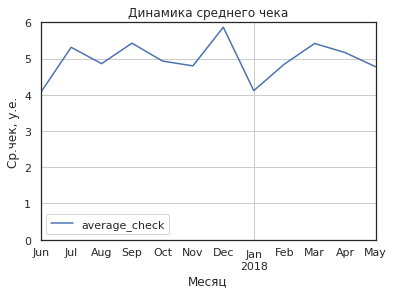

In [81]:
df_average_check.plot(x = 'by_month', y = 'average_check',grid = True)
plt.title('Динамика среднего чека') #называем таблицу
plt.ylim(0,6)
plt.ylabel('Ср.чек, у.е.') #назовем сторону y
plt.xlabel('Месяц') #назовем сторону x

###### Вывод  
Средний чек за год составил 5 условных едениц, колебаясь от 4.06 в июне 2017 до 5.86 у.е в декабре 2017 ( с большой покупкой более 2500 у.е. в конце декабря).  
Стоит отметить, что по году распределение среднего чека неравномерно, что приводит и к значительным колебаниям в выручке, даже с примерно одинаковым трафиком (например сентябрь 2017 и апрель 2018)

##### Шаг 2.2.4 Рассчитаем LTV по кагортам, которые существуют более 6 месяцев

In [82]:
#соеденим 2 датасета
df_new = df_v.join(df_ol, on = 'uid',how='left',lsuffix='_left', rsuffix='_right')
df_new

,device,end_ts,source_id,start_ts,uid_left,session_year,session_month,session_week,session_date,delta,first_activity_date,activity_month,first_activity_month,cohort_lifetime,buy_ts,revenue,uid_right,first_revenue_date,by_month,first_by_month,cohort_lifetime2
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0,NaT,NaN,NaN,NaT,NaT,NaT,NaN
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0,NaT,NaN,NaN,NaT,NaT,NaT,NaN
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0,NaT,NaN,NaN,NaT,NaT,NaT,NaN
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-05-01,2018-03-01,2,NaT,NaN,NaN,NaT,NaT,NaT,NaN
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0,NaT,NaN,NaN,NaT,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210048,touch,2017-09-20 07:45:00,4,2017-09-20 07:41:00,18076715555312526462,2017,9,38,2017-09-20,240,2017-07-21 17:47:00,2017-09-01,2017-07-01,2,NaT,NaN,NaN,NaT,NaT,NaT,NaN
210049,desktop,2017-12-30 13:52:00,2,2017-12-30 13:52:00,6462599665322029214,2017,12,52,2017-12-30,0,2017-12-30 13:52:00,2017-12-01,2017-12-01,0,NaT,NaN,NaN,NaT,NaT,NaT,NaN
210050,touch,2018-04-11 22:08:00,4,2018-04-11 22:08:00,3826195039232953627,2018,4,15,2018-04-11,0,2018-04-11 22:08:00,2018-04-01,2018-04-01,0,NaT,NaN,NaN,NaT,NaT,NaT,NaN
210051,desktop,2018-03-29 10:32:00,3,2018-03-29 10:26:00,7628613230184553595,2018,3,13,2018-03-29,360,2018-03-29 10:26:00,2018-03-01,2018-03-01,0,NaT,NaN,NaN,NaT,NaT,NaT,NaN


In [83]:
#создадим датасет с уникальным кол-вом пользователей в каждом  месяце
cohort_sizes = (
    df_ol.groupby('first_by_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_by_month', 'n_buyers']

In [84]:
cohort_sizes

,first_by_month,n_buyers
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369
3,2017-09-01,2579
4,2017-10-01,4340
5,2017-11-01,4078
6,2017-12-01,4380
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3534


In [85]:
#найдем выручку по каждому месяцу 
cohorts_revenue = df_ol.groupby(['first_by_month','by_month']).agg({'revenue': 'sum'}).reset_index()
cohorts_revenue

,first_by_month,by_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [86]:
#объеденим датасеты
report = pd.merge(cohort_sizes, cohorts_revenue, on='first_by_month')
report

,first_by_month,n_buyers,by_month,revenue
0,2017-06-01,2022,2017-06-01,9557.49
1,2017-06-01,2022,2017-07-01,981.82
2,2017-06-01,2022,2017-08-01,885.34
3,2017-06-01,2022,2017-09-01,1931.30
4,2017-06-01,2022,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3534,2018-05-01,1114.87
75,2018-04-01,2274,2018-04-01,10600.69
76,2018-04-01,2274,2018-05-01,1209.92
77,2018-05-01,2986,2018-05-01,13925.76


In [87]:
margin_rate = 1
#найдем валовую выручку и создадим когорты
report['gp'] = report['revenue'] * margin_rate
report['age'] = ((report['by_month'] - report['first_by_month']) / np.timedelta64(1, 'M')).round().astype('int')
report

,first_by_month,n_buyers,by_month,revenue,gp,age
0,2017-06-01,2022,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2022,2017-07-01,981.82,981.82,1
2,2017-06-01,2022,2017-08-01,885.34,885.34,2
3,2017-06-01,2022,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2022,2017-10-01,2068.58,2068.58,4
...,...,...,...,...,...,...
74,2018-03-01,3534,2018-05-01,1114.87,1114.87,2
75,2018-04-01,2274,2018-04-01,10600.69,10600.69,0
76,2018-04-01,2274,2018-05-01,1209.92,1209.92,1
77,2018-05-01,2986,2018-05-01,13925.76,13925.76,0


In [88]:
#рассчитаем LTV
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_by_month', columns='age', values='ltv', aggfunc='mean'
)

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_by_month,,,,,,,,,,,,
2017-06-01,4.726751,0.485569,0.437854,0.955143,1.02304,0.735865,0.950198,0.581879,0.553487,0.606088,0.571543,0.256983
2017-07-01,6.013345,0.335385,0.623855,0.359162,0.176883,0.156129,0.120271,0.141894,0.161316,0.147222,0.155754,
2017-08-01,5.280373,0.472337,0.458817,0.391563,0.494412,0.283747,0.210818,0.405303,0.292425,0.188115,,
2017-09-01,5.648907,1.11845,0.519938,3.97888,0.400869,0.647569,0.702152,0.243339,0.184149,,,
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.15156,0.120362,0.0848157,0.11547,,,,
2017-11-01,5.159358,0.398808,0.199703,0.325191,0.147903,0.0539186,0.115012,,,,,
2017-12-01,4.742434,0.260553,0.925731,1.066,0.313144,0.338279,,,,,,
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.0626979,,,,,,,
2018-02-01,4.156987,0.278274,0.0785155,0.0741441,,,,,,,,


In [89]:
output.index = output.index.strftime("%m/%Y")

In [90]:
output_cumsum = output.cumsum(axis=1).head(7)

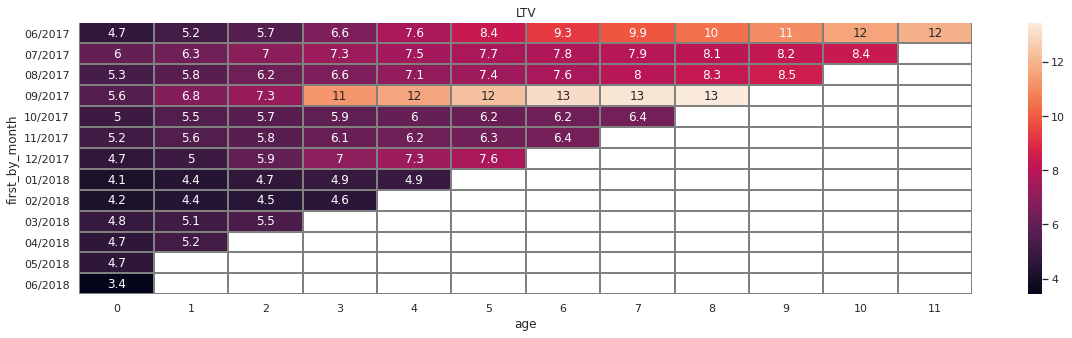

In [98]:
sns.set(style='white')
plt.figure(figsize=(20, 5))
plt.title('LTV')
sns.heatmap(output.cumsum(axis=1),annot=True, linewidths=1, linecolor='gray')

##### Вывод  
Средний LTV значительно отличается от когорты к когорте и на 6ой месяц варируется от 6.2 (когорта октября) до 12 (когорта сентября).  
Если рассматривать весь исследуемый период, то наибольший LTV имеют когорты 2017ого года введу их большего возраста, а больше всего отличаются июнькая и сентябрьская когорты со значениями 12 и 13 соответственно. 

#### 2.3. Маркетинговые метрики <a id="5"></a>

##### 2.3.1 Считаем общую сумму расходов на маркетинг, по источникам, по времени

In [100]:
#найдем общую сумму затрат на маркетинг
df_c['costs'].sum()

329131.62

In [101]:
df_c['dt_month'] = df_c['dt'].astype('datetime64[M]')

In [102]:
#найдем суммы затрат по месяцам
df_c_m= df_c.pivot_table(index = ['dt_month'], values = 'costs', aggfunc = 'sum')
df_c_m

,costs
dt_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


In [103]:
df_c_m.index = df_c_m.index.strftime("%m/%Y")

Text(0.5, 0, 'Месяц,год')

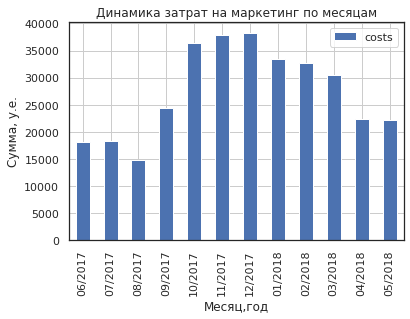

In [104]:
df_c_m.plot(kind = 'bar', grid = True)
plt.title('Динамика затрат на маркетинг по месяцам') #называем таблицу
plt.ylabel('Сумма, у.е.') #назовем сторону y
plt.xlabel('Месяц,год') #назовем сторону x

In [105]:
#найдем суммы затрат по источникам
df_c_m_s = df_c.pivot_table(index = ['source_id'], values = 'costs', aggfunc = 'sum')
df_c_m_s

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Text(0.5, 0, 'Источник')

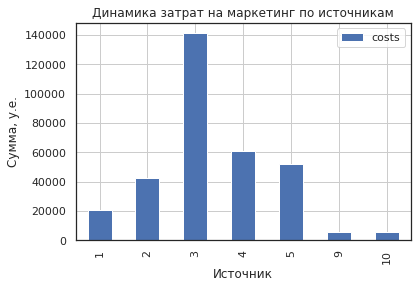

In [106]:
df_c_m_s.plot(kind = 'bar', grid = True)
plt.title('Динамика затрат на маркетинг по источникам') #называем таблицу
plt.ylabel('Сумма, у.е.') #назовем сторону y
plt.xlabel('Источник') #назовем сторону x

In [107]:
df_c

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


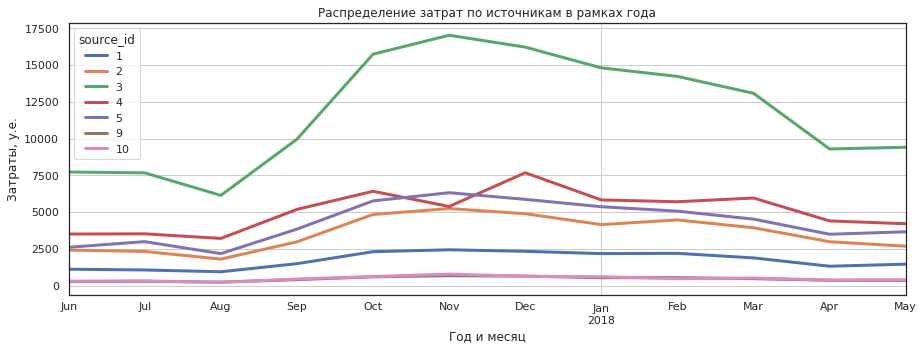

In [108]:
#изучим распределение затрат по месяцам в рамках каждого исчточника
df_c.pivot_table(index = 'dt_month', columns = 'source_id', values = 'costs',aggfunc = 'sum').plot(grid = True,figsize = (15,5),linewidth=3)
plt.title('Распределение затрат по источникам в рамках года') #называем таблицу
plt.ylabel('Затраты, у.е.') #назовем сторону y
plt.xlabel('Год и месяц') #назовем сторону x
plt.show()

##### Вывод  
Общая сумма затрат на маркетинг за год составила - 329131.62 у.е.  
Более 35 тысяч у.е. было потрачено в месяц начиная с октября 2017 и заканчивая декабрем 2017, далее затраты идут на спад. Минимальные же затраты ( чуть менее 15 тысяч у.е.) были в августе 2017 года.  
Больше всего отдел маркетинга вкладывался в источник трафика номер три ( более 140 тысяч у.е.) на протяжении всего года, при этом начал нарашщивать затраты с сентября, достиг пика в ноябре и далее стал сокращать до апреля, сохраняя прежние темы в мае 2018 года. Во второй, четвертый и пятый источники трафика было вложено от 40 до 60 тысяч у.е. Их затраты менялись практически идентичны друг друг по году, однако значительно выделятся декабпь 2017 на 4ом источнике, куда затраты значительно увеличились.
Источниками с наименьшими вложениями( 5500 и 5800 у.е.) стали  девятый и десятый соответсвенно, при этом в 10ий источник вкладывалась практически одинаковая сумма денег каждый месяц. 

##### 2.3.2 Считаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика

In [116]:
first_source = df_v.sort_values(by = 'start_ts')
first_source = first_source.groupby ('uid')['source_id'].agg('first').reset_index()

In [117]:
#Вычисляем первый источник для юзера по табличке с посетителями сайта
first_source.columns = ['uid', 'first_source_id']
#Джойним по юзеру его к табличке с заказами
orders = pd.merge (first_source, df_ol, on='uid')

In [118]:
orders['by_month'] = orders['buy_ts'].astype('datetime64[M]')
orders

,uid,first_source_id,buy_ts,revenue,first_revenue_date,by_month,first_by_month,cohort_lifetime2
0,313578113262317,2,2018-01-03 21:51:00,0.55,2018-01-03 21:51:00,2018-01-01,2018-01-01,0
1,2464366381792757,5,2018-01-28 15:54:00,2.44,2018-01-28 15:54:00,2018-01-01,2018-01-01,0
2,2551852515556206,5,2017-11-24 10:14:00,6.32,2017-11-24 10:14:00,2017-11-01,2017-11-01,0
3,2551852515556206,5,2017-11-24 11:24:00,4.67,2017-11-24 10:14:00,2017-11-01,2017-11-01,0
4,3077748354309989,3,2018-03-03 12:33:00,4.67,2018-03-03 12:33:00,2018-03-01,2018-03-01,0
...,...,...,...,...,...,...,...,...
39683,18445407535914413204,3,2017-09-24 23:48:00,0.24,2017-09-22 23:55:00,2017-09-01,2017-09-01,0
39684,18445407535914413204,3,2017-09-25 15:56:00,0.12,2017-09-22 23:55:00,2017-09-01,2017-09-01,0
39685,18445601152732270159,2,2018-03-26 22:54:00,4.22,2018-03-26 22:54:00,2018-03-01,2018-03-01,0
39686,18446156210226471712,3,2018-02-18 19:34:00,9.78,2018-02-18 19:34:00,2018-02-01,2018-02-01,0


In [119]:
#находим дату первой покупки
first_by_month = orders.groupby(['uid'])['by_month'].min()
first_by_month.name = 'first_by_month'
#объеденим 2 датасета
orders = orders.merge(first_by_month,on='uid') 

In [121]:
#находим кол-во людей в когортах
punct_3 = orders.pivot_table(index = ['first_by_month_y','first_source_id'], values = 'uid', aggfunc = {'uid': 'nunique'}).reset_index()
punct_3.columns = ['first_by_month','first_source_id','count_users']
punct_3

,first_by_month,first_source_id,count_users
0,2017-06-01,1,152
1,2017-06-01,2,193
2,2017-06-01,3,441
3,2017-06-01,4,293
4,2017-06-01,5,261
...,...,...,...
80,2018-05-01,3,541
81,2018-05-01,4,524
82,2018-05-01,5,333
83,2018-05-01,9,37


In [122]:
#Находим revenue по источнику, первой дате покупки и дате покупки
punct_4 = orders.pivot_table(index = ['first_by_month_y', 'by_month', 'first_source_id'], values = 'revenue', aggfunc = 'sum').reset_index()
punct_4.columns = ('first_by_month','by_month','first_source_id','revenue')
punct_4

,first_by_month,by_month,first_source_id,revenue
0,2017-06-01,2017-06-01,1,1073.20
1,2017-06-01,2017-06-01,2,1009.98
2,2017-06-01,2017-06-01,3,2060.79
3,2017-06-01,2017-06-01,4,1447.45
4,2017-06-01,2017-06-01,5,1327.88
...,...,...,...,...
503,2018-05-01,2018-05-01,3,2121.26
504,2018-05-01,2018-05-01,4,2658.54
505,2018-05-01,2018-05-01,5,1463.71
506,2018-05-01,2018-05-01,9,169.46


In [123]:
#Объединяем получившиеся таблицы
punct_5 = punct_4.merge(punct_3, on =['first_by_month','first_source_id'])
punct_5

,first_by_month,by_month,first_source_id,revenue,count_users
0,2017-06-01,2017-06-01,1,1073.20,152
1,2017-06-01,2017-07-01,1,366.56,152
2,2017-06-01,2017-08-01,1,456.70,152
3,2017-06-01,2017-09-01,1,834.12,152
4,2017-06-01,2017-10-01,1,889.53,152
...,...,...,...,...,...
503,2018-05-01,2018-05-01,3,2121.26,541
504,2018-05-01,2018-05-01,4,2658.54,524
505,2018-05-01,2018-05-01,5,1463.71,333
506,2018-05-01,2018-05-01,9,169.46,37


In [124]:
margin_rate = 1
#найдем валовую выручку и создадим когорты
punct_5['gp'] = punct_5['revenue'] * margin_rate
punct_5['age'] = ((punct_5['by_month'] - punct_5['first_by_month']) / np.timedelta64(1, 'M')).round().astype('int')
punct_5

,first_by_month,by_month,first_source_id,revenue,count_users,gp,age
0,2017-06-01,2017-06-01,1,1073.20,152,1073.20,0
1,2017-06-01,2017-07-01,1,366.56,152,366.56,1
2,2017-06-01,2017-08-01,1,456.70,152,456.70,2
3,2017-06-01,2017-09-01,1,834.12,152,834.12,3
4,2017-06-01,2017-10-01,1,889.53,152,889.53,4
...,...,...,...,...,...,...,...
503,2018-05-01,2018-05-01,3,2121.26,541,2121.26,0
504,2018-05-01,2018-05-01,4,2658.54,524,2658.54,0
505,2018-05-01,2018-05-01,5,1463.71,333,1463.71,0
506,2018-05-01,2018-05-01,9,169.46,37,169.46,0


In [125]:
#рассчитаем LTV
punct_5['ltv'] = punct_5['gp'] / punct_5['count_users']

In [126]:
df_c['dt_costs'] = df_c['dt'].astype('datetime64[M]')

In [127]:
#Косты группируем по источнику+месяцу
punct_6 = df_c.pivot_table(index = ['source_id','dt_costs'],values = 'costs', aggfunc = 'sum').reset_index()
punct_6.columns = ['first_source_id','first_by_month','costs']
punct_6

,first_source_id,first_by_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [128]:
punct_7 = punct_5.merge(punct_6, on =['first_by_month','first_source_id'])
punct_7

,first_by_month,by_month,first_source_id,revenue,count_users,gp,age,ltv,costs
0,2017-06-01,2017-06-01,1,1073.20,152,1073.20,0,7.060526,1125.61
1,2017-06-01,2017-07-01,1,366.56,152,366.56,1,2.411579,1125.61
2,2017-06-01,2017-08-01,1,456.70,152,456.70,2,3.004605,1125.61
3,2017-06-01,2017-09-01,1,834.12,152,834.12,3,5.487632,1125.61
4,2017-06-01,2017-10-01,1,889.53,152,889.53,4,5.852171,1125.61
...,...,...,...,...,...,...,...,...,...
502,2018-05-01,2018-05-01,3,2121.26,541,2121.26,0,3.920998,9411.42
503,2018-05-01,2018-05-01,4,2658.54,524,2658.54,0,5.073550,4214.21
504,2018-05-01,2018-05-01,5,1463.71,333,1463.71,0,4.395526,3669.56
505,2018-05-01,2018-05-01,9,169.46,37,169.46,0,4.580000,362.17


In [129]:
#находим CAC 
punct_7['cac'] = punct_7['costs'] / punct_7['count_users']
punct_7

,first_by_month,by_month,first_source_id,revenue,count_users,gp,age,ltv,costs,cac
0,2017-06-01,2017-06-01,1,1073.20,152,1073.20,0,7.060526,1125.61,7.405329
1,2017-06-01,2017-07-01,1,366.56,152,366.56,1,2.411579,1125.61,7.405329
2,2017-06-01,2017-08-01,1,456.70,152,456.70,2,3.004605,1125.61,7.405329
3,2017-06-01,2017-09-01,1,834.12,152,834.12,3,5.487632,1125.61,7.405329
4,2017-06-01,2017-10-01,1,889.53,152,889.53,4,5.852171,1125.61,7.405329
...,...,...,...,...,...,...,...,...,...,...
502,2018-05-01,2018-05-01,3,2121.26,541,2121.26,0,3.920998,9411.42,17.396340
503,2018-05-01,2018-05-01,4,2658.54,524,2658.54,0,5.073550,4214.21,8.042385
504,2018-05-01,2018-05-01,5,1463.71,333,1463.71,0,4.395526,3669.56,11.019700
505,2018-05-01,2018-05-01,9,169.46,37,169.46,0,4.580000,362.17,9.788378


In [130]:
#находим CAC по источнику трафика
cac_for_source = punct_7.pivot_table(index = 'first_source_id', values = 'cac', aggfunc = 'mean').round(decimals=2)
cac_for_source

,cac
first_source_id,
1,8.16
2,14.07
3,21.11
4,9.80
5,10.05
9,5.05
10,7.66


Text(0.5, 0, 'Источник')

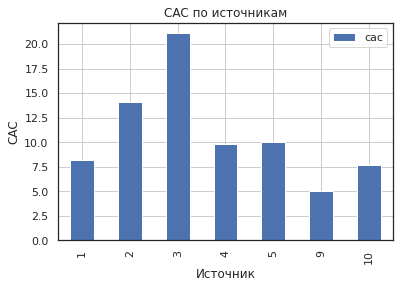

In [131]:
cac_for_source.plot(kind = 'bar', grid = True,  y = 'cac')
plt.title('CAC по источникам') #называем таблицу
plt.ylabel('CAC') #назовем сторону y
plt.xlabel('Источник') #назовем сторону x

In [132]:
#находим CAC по месяцу
cac_for_month = punct_7.pivot_table(index = 'first_by_month', values = 'cac', aggfunc = 'mean').round(decimals=2)
cac_for_month.index = cac_for_month.index.strftime("%m/%Y")
cac_for_month2 = cac_for_month.reset_index()
cac_for_month2

,first_by_month,cac
0,06/2017,10.50
1,07/2017,11.06
2,08/2017,12.93
3,09/2017,11.21
4,10/2017,9.73
5,11/2017,10.66
6,12/2017,10.64
7,01/2018,12.53
8,02/2018,11.52
9,03/2018,9.94


Text(0.5, 0, 'Дата')

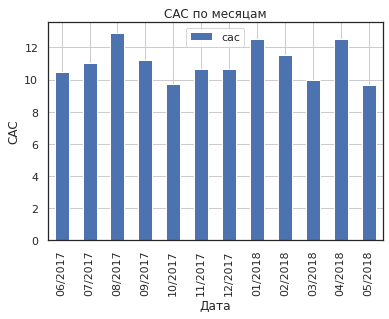

In [135]:
cac_for_month2.plot(kind = 'bar', grid = True, x = 'first_by_month', y = 'cac')
plt.title('CAC по месяцам') #называем таблицу
plt.ylabel('CAC') #назовем сторону y
plt.xlabel('Дата') #назовем сторону x

In [136]:
#Рассчитаем CAC по году
cac_full = punct_7.pivot_table(index = 'first_by_month', values = ['count_users','costs'], aggfunc = 'mean').reset_index()
cac_full

,first_by_month,costs,count_users
0,2017-06-01,2879.281081,229.689189
1,2017-07-01,2870.075507,227.246377
2,2017-08-01,2257.577692,153.769231
3,2017-09-01,3742.446379,291.689655
4,2017-10-01,5271.923636,466.036364
5,2017-11-01,5415.411429,447.714286
6,2017-12-01,5981.806842,510.157895
7,2018-01-01,5179.673437,380.281250
8,2018-02-01,4994.605385,396.423077
9,2018-03-01,4345.038571,363.857143


In [137]:
cac_years = cac_full['costs'].sum() / cac_full['count_users'].sum()
cac_years

12.37209862285565

##### Вывод:  
На привлечение одного клиента по году из бюджета маркетинга расходуется 9.06 у.е.  
6,7 и 8 источники трафика для нас бесплатные, при этом самыми дорогими источниками являются второй и третий, через привлечение которых за одного покупателя мы заплатили 12.7 и 14.1 у.е. соответсвенно. Минимальную же стоимость за 1 клиента имеют 9 и 10 источник ( по 5 у.е.)  
Распределение же по месяцам демонстирует неоднородность: меньше всего стоило привлечение одного клиента в мае 2018ого (6.52 у.е.) и больше всего в августе 2017 ( 9.89 у.е.), хотя недалеко от этой суммы ушли и январь и апрель 2018ого года ( по 9.5 у.е.)

#####  Шаг 2.3.3. Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт.

In [138]:
#рассчитаем ROMI
punct_7['romi'] = punct_7['ltv']/punct_7['cac']
punct_7

,first_by_month,by_month,first_source_id,revenue,count_users,gp,age,ltv,costs,cac,romi
0,2017-06-01,2017-06-01,1,1073.20,152,1073.20,0,7.060526,1125.61,7.405329,0.953439
1,2017-06-01,2017-07-01,1,366.56,152,366.56,1,2.411579,1125.61,7.405329,0.325655
2,2017-06-01,2017-08-01,1,456.70,152,456.70,2,3.004605,1125.61,7.405329,0.405736
3,2017-06-01,2017-09-01,1,834.12,152,834.12,3,5.487632,1125.61,7.405329,0.741038
4,2017-06-01,2017-10-01,1,889.53,152,889.53,4,5.852171,1125.61,7.405329,0.790265
...,...,...,...,...,...,...,...,...,...,...,...
502,2018-05-01,2018-05-01,3,2121.26,541,2121.26,0,3.920998,9411.42,17.396340,0.225392
503,2018-05-01,2018-05-01,4,2658.54,524,2658.54,0,5.073550,4214.21,8.042385,0.630851
504,2018-05-01,2018-05-01,5,1463.71,333,1463.71,0,4.395526,3669.56,11.019700,0.398879
505,2018-05-01,2018-05-01,9,169.46,37,169.46,0,4.580000,362.17,9.788378,0.467902


In [139]:
punct_7['first_by_month'] = pd.to_datetime(punct_7['first_by_month'], format = '%m/%Y')

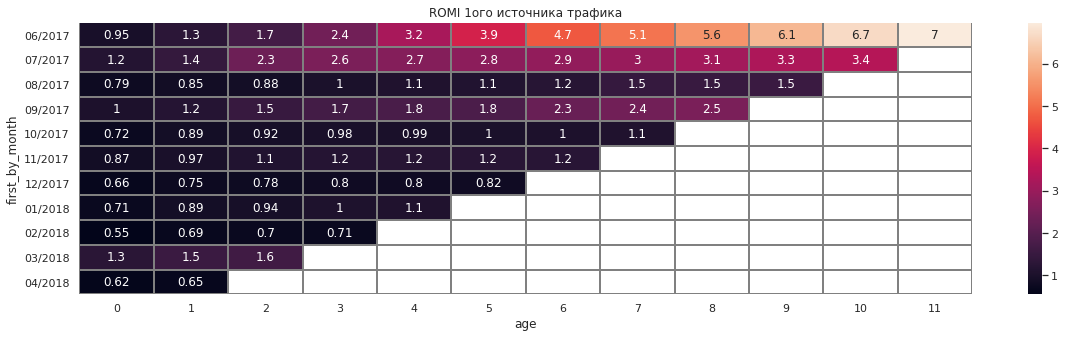

In [140]:
#Выведем ROMI по когортам в динамике
source_id_1 = punct_7.query('first_source_id == 1 and first_by_month < "2018-05-01T00:00:00.000000000"')
source_1 = source_id_1.pivot_table(index = 'first_by_month', columns = 'age', values = 'romi').cumsum(axis=1)
source_1.index = source_1.index.strftime("%m/%Y")
sns.set(style='white')
plt.figure(figsize=(20, 5))
plt.title('ROMI 1ого источника трафика')
sns.heatmap(source_1, annot=True, linewidths=1, linecolor='gray')

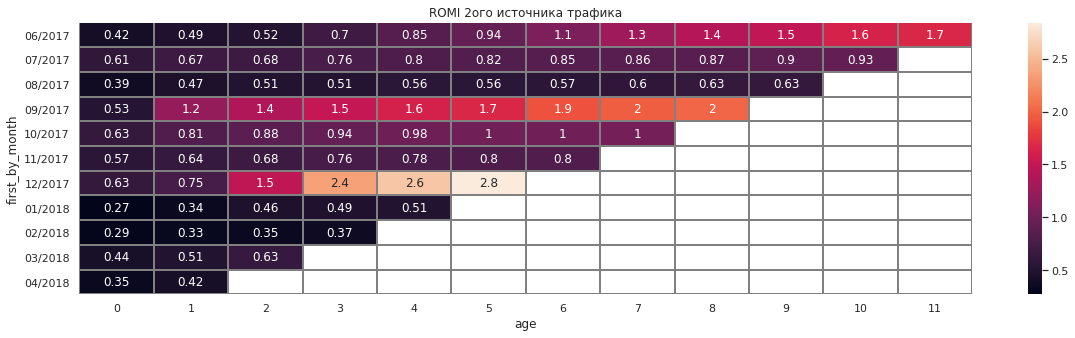

In [141]:
#Выведем ROMI по когортам в динамике
source_id_2 = punct_7.query('first_source_id == 2 and first_by_month < "2018-05-01T00:00:00.000000000"')
source_2 = source_id_2.pivot_table(index = 'first_by_month', columns = 'age', values = 'romi').cumsum(axis=1)
source_2.index = source_2.index.strftime("%m/%Y")
sns.set(style='white')
plt.figure(figsize=(20, 5))
plt.title('ROMI 2ого источника трафика')
sns.heatmap(source_2, annot=True, linewidths=1, linecolor='gray')

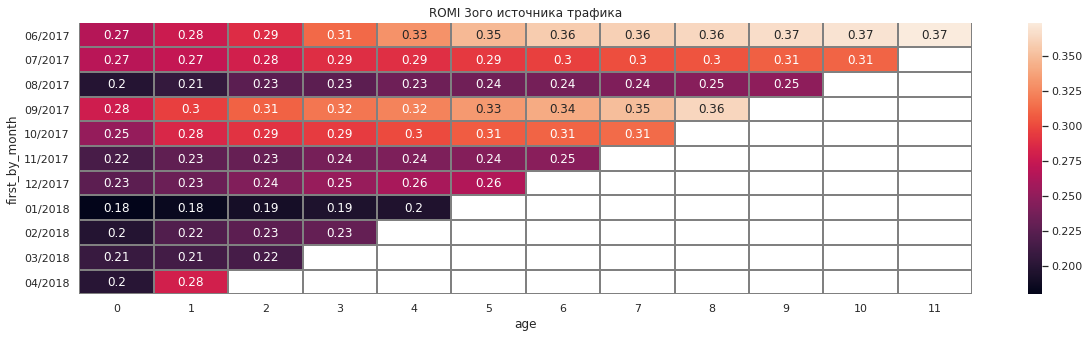

In [142]:
source_id_3 = punct_7.query('first_source_id == 3 and first_by_month < "2018-05-01T00:00:00.000000000"')
source_3 = source_id_3.pivot_table(index = 'first_by_month', columns = 'age', values = 'romi').cumsum(axis=1)
source_3.index = source_3.index.strftime("%m/%Y")
sns.set(style='white')
plt.figure(figsize=(20, 5))
plt.title('ROMI 3ого источника трафика')
sns.heatmap(source_3, annot=True, linewidths=1, linecolor='gray')

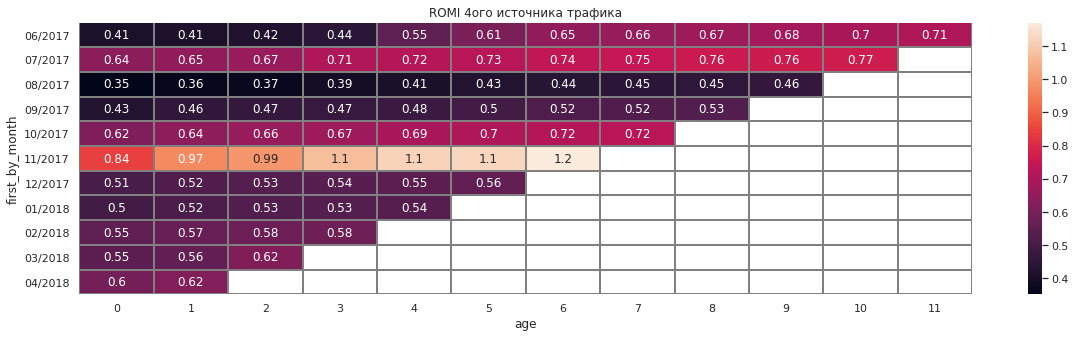

In [143]:
source_id_4 = punct_7.query('first_source_id == 4 and first_by_month < "2018-05-01T00:00:00.000000000"')
source_4 = source_id_4.pivot_table(index = 'first_by_month', columns = 'age', values = 'romi').cumsum(axis=1)
source_4.index = source_4.index.strftime("%m/%Y")
sns.set(style='white')
plt.figure(figsize=(20, 5))
plt.title('ROMI 4ого источника трафика')
sns.heatmap(source_4, annot=True, linewidths=1, linecolor='gray')

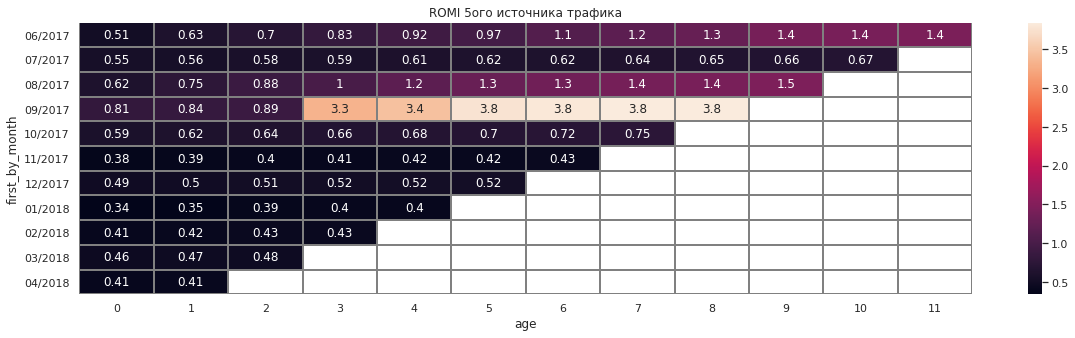

In [144]:
source_id_5 = punct_7.query('first_source_id == 5 and first_by_month < "2018-05-01T00:00:00.000000000"')
source_5 = source_id_5.pivot_table(index = 'first_by_month', columns = 'age', values = 'romi').cumsum(axis=1)
source_5.index = source_5.index.strftime("%m/%Y")
sns.set(style='white')
plt.figure(figsize=(20, 5))
plt.title('ROMI 5ого источника трафика')
sns.heatmap(source_5, annot=True, linewidths=1, linecolor='gray')

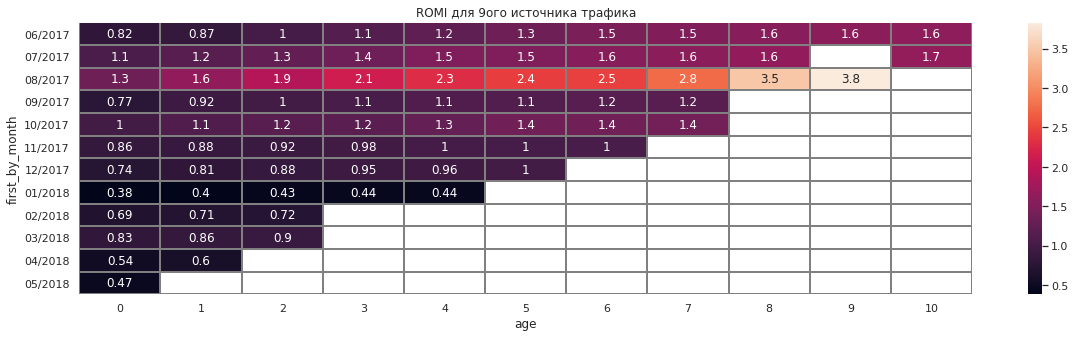

In [145]:
source_id_9 = punct_7.query('first_source_id == 9') 
source_9 = source_id_9.pivot_table(index = 'first_by_month', columns = 'age', values = 'romi').cumsum(axis=1)
source_9.index = source_9.index.strftime("%m/%Y")
sns.set(style='white')
plt.figure(figsize=(20, 5))
plt.title('ROMI для 9ого источника трафика')
sns.heatmap(source_9, annot=True, linewidths=1, linecolor='gray')

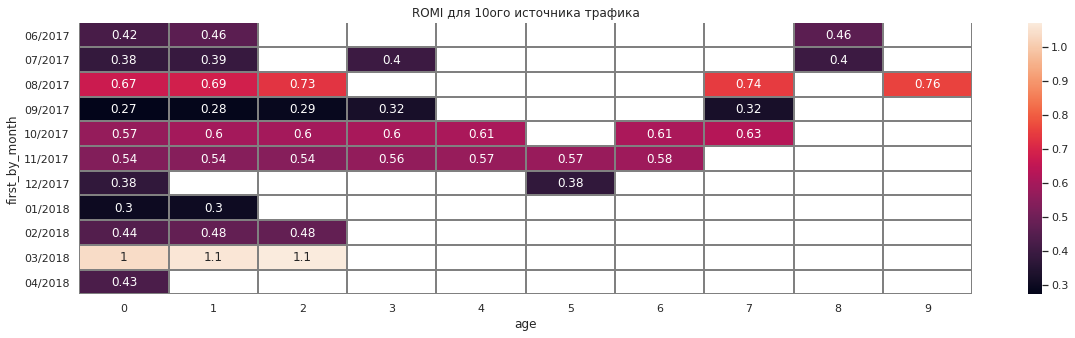

In [146]:
source_id_10 = punct_7.query('first_source_id == 10 and first_by_month < "2018-05-01T00:00:00.000000000"')
source_10 = source_id_10.pivot_table(index = 'first_by_month', columns = 'age', values = 'romi').cumsum(axis=1)
source_10.index = source_10.index.strftime("%m/%Y")
sns.set(style='white')
plt.figure(figsize=(20, 5))
plt.title('ROMI для 10ого источника трафика')
sns.heatmap(source_10, annot=True, linewidths=1, linecolor='gray')

In [147]:
#выведем LTV по кагортам для доп. общих выводов
punct_x = punct_7.pivot_table(index=['first_source_id'],columns = 'age', values = 'ltv', aggfunc = {'ltv':'mean'}).cumsum(axis=1)
punct_x

age,0,1,2,3,4,5,6,7,8,9,10,11
first_source_id,,,,,,,,,,,,
1,6.754715,8.119577,9.570623,10.946403,12.043156,13.054805,14.923810,16.445351,17.831815,19.578650,22.258200,24.319910
2,6.719672,8.689864,10.670227,12.941132,14.095135,14.995222,15.996328,16.832066,17.516374,17.942214,19.043395,19.556037
3,4.679205,5.079421,5.261307,5.412565,5.540653,5.668060,5.763008,5.871122,5.987770,6.065068,6.116391,6.183488
4,4.819927,5.040173,5.187991,5.369757,5.643119,5.857418,6.090322,6.179570,6.280916,6.376754,6.490964,6.572056
5,5.045938,5.381515,5.741295,8.401247,8.903613,9.541849,9.978878,10.339563,10.670217,11.258206,11.411917,11.592875
9,4.213113,4.624461,5.014658,5.390570,5.705684,5.968760,6.204481,6.494735,7.594185,8.290051,8.381294,NaN
10,3.543011,3.644218,3.739378,3.895233,3.938573,3.956489,4.013214,4.077548,4.090798,4.215242,NaN,NaN


###### Вывод:
Затраты в **1ый источник трафика** окупаются уже на 1-2ой месяц существования кагорты, однако начиная с декабря 2017 года тенденция изменилась и даже на 6ой месяй ROMI меньше еденицы. Исключением лишь стала кагорта от марта 2018ого года, где ROMI уже в первом месяце составил 1.4  
Затраты во **2ой источник трафика** окупаются неравномерно по кагортам: лишь кагорты от июня, июля, сентября, октября и декабря имеют ROMI выше 1.  
Затраты на **3ий источник трафика** ни у одной из кагорт не окупились. Лучшее значение достигло 0.49 у июльской кагорты.  
Затраты на **4ый источник трафика** окупились у кагорты от июня 2017ого и от ноября 2017. По всем же остальным отмечается прирост в ROMI от месяца к месяцу, однако срок окупаемости вероятно составит больше 12 месяцев.  
Затраты на **5ый источник трафика** окупились для когорты от июня, августа и сентября на 3-4 месяц жизни кагорты, однако для остальных срок окупаемости будет всреднем больше 12 месяцев.  
Затраты на **9ый источник трафика** окупились для кагорт с июня по октябр включительно (сроком от 1 до 4х месяцев), однако данный источник плохо показал себя в январе, где ROMI почти в 2 раза хуже, чем у других когорт.  
Затраты на **10ый источник трафика** не оправдывают себя вовсе, за иключением вложениий марта 2018ого года. Кроме того, пользователи возвращаются далеко не каждый месяц ща покупками на наш сайт.  

### Шаг 3.0 Выводы и рекомендации  <a id="6"></a>

##### 3.1 Источники трафика, на которые стоит сделать упор 

1. Необходимо увеличить рекламный бюджет для первого источника трафика, так как на данный момент он демонстрирует LTV в 2 раза выше, чем у большинства других источников, а также окупается зачастую уже в первый месяц жизни кагорты. Кроме того, затраты на него в данный момент одни из самых низких и вцелом (почти 21 тысяча у.е.) и на 1 пользователя ( 7 у.е.). Стоит обратиться к опыту первой половину 2,
2. Необходимо увеличить рекламный бюджет для девятого источника трафика, так как на данный момент на него выделяется почти самая маленькая сумма по году ( 5822 у.е.), что в переводе на одного клиента составляет 5.05 у.е., а ROMI же его на ровне с 2м и 5м источниками

##### 3.2 Выводы после подсчета различных групп метрик

**Выводы с метрик маркетинговых**  
1. Необходимо рассмотреть дальнейшнее сокращение вложений в 3ий источник трафика, так как его ROMI калеблется в районе 0.45,а LTV в 2 раза ниже, чем у первого источника;
2. Также стоит обратить внимание, что клиенты, пришедшие через 10ый источник трафика заказывают далеко не каждый месяц и их ROMI не достигает единицы. Возможно стоит изменить рекламный посыл, который дается в этом источнике или увеличить рекламный бюджет,а возможно и  отказаться от него вовсе;
3. Затраты на 2ой источник можно оставить на прежнем уровне, так как не смотря на высокий CAC в 12.67, уже на 5ый месяц данный источник окупается.   
**Выводы с метрик продуктовых**  
1. Такие мероприятия, как Черная пятница значительно увеличивают кол-во визитов на сайт, а значит к этой дате необходимо подготавливать специальные предложения для достижения максимального ROMI;  
2. Необходимо добится более устойчивой работы сайта для избежания его падения на длительные промежутки времени;  
3. Клиенты, пришедшие летом и осенью имеют более высокий Retention, что можно связать с сезонностью: летом получен положительный опыт заказа на сайте и далее в сезон пользователь приходит снова на тот же сайт;    
**Выводы с метрик электронной коммерции**    
1. Посетителя сайта совершают первую покупку всреднем спустя 249 минут, однако четко выделяется группа пользователей с оплатой после 1000 минуты первого входа на сайт,  а значит возможно  догоняющая реклама позволит нам увелить выручку. 
2. В сентябре и зимой можно работать над предложениями, увеличивающими кол-во заказов одним пользователем (например, декабрь,январь - новогодние мероприятия, февраль - на 23е февраля, ), так как в эти месяцы естественный путем увеличивается средний чек ( от 3.7 на пользователя, который совершает первую покупку на сайте).
3. Уже с первого месяца каждый пользователь совершает более 1 заказа на сайте в месяц, при этом июньская кагорта сильно выделяется относительно остальных, ведь там кол-во заказов в месяц на одного пользователя не превышает 1.2, а вот когорта декабря сразу стартанула с 4.5 у.е. Таким образом для увеличения LTV и соответсвенно ROMI стоит обратить внимание в рекламе и на увеличение кол-ва заказов одним пользователем в месяц.

##### 3.3 Самые перспективные когорты клиентов

Самыми перспектиными на данном этапе являются когорты от июня 2017 года и от мая 2018, у каждой из которых прогнозный LTV по месяцу составит от 0.25 до 0.55